### Part A

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns # for plotting heatmap

from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
#Reading CSV files
train = pd.read_csv('CE802_P2_Data.csv')

In [3]:
#Viewing training dataset
train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


The info() shows us the missing data in the train df

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

The train dataset have NaN values. I am using KNN imputer to deal with the missing data.
Initially I am removing the class column from the df and  also normalizing the data so it does not produce biased values.

In [5]:
#For normalizing between 0-1
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)

In [6]:
#Imputing missing values
imputer = KNNImputer(n_neighbors=7)
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

In [7]:
y = train.Class
X = train.drop('Class',axis = 1)

In [8]:
#Splitting data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) # 70% training and 30% test

Plot a correlation matrix to explore the correlation between features.

Text(0.5, 1.0, 'Correlation between different fearures')

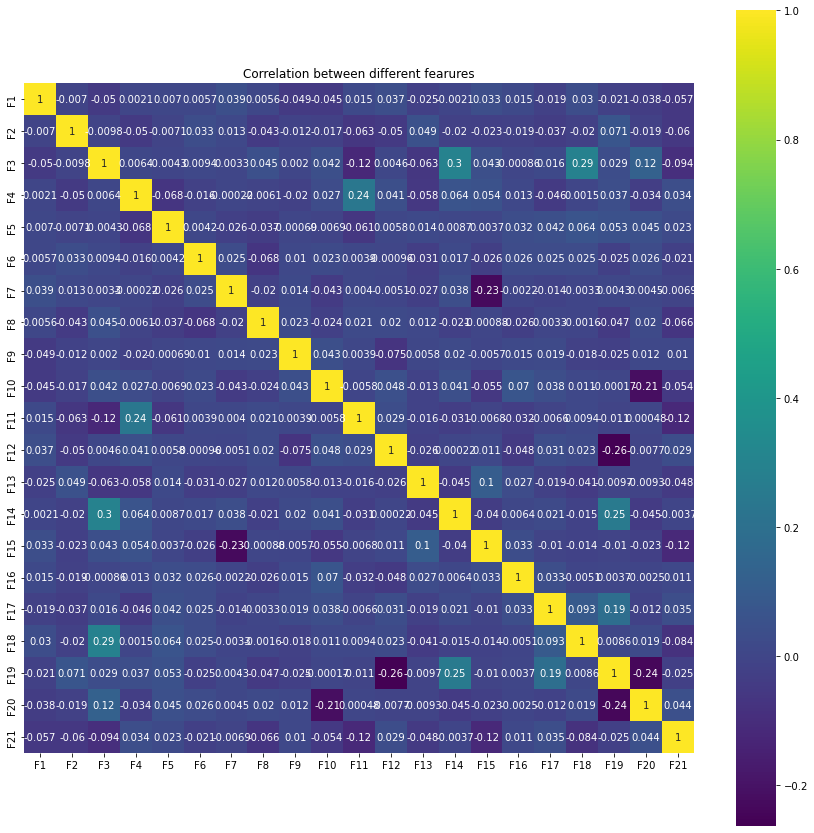

In [9]:
correlation = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

Majority of the variables are not very closely correlated.

In [10]:
pca = PCA(n_components=21)
pca.fit(X)

PCA(n_components=21)

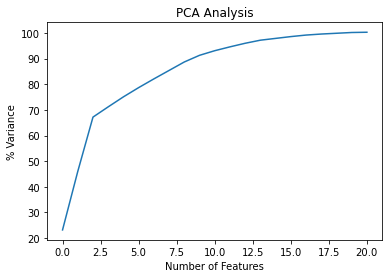

In [11]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

PCA is used to represent a multivariate data table as a smaller number of variables.
Might be able to capture more variability in dataset with a larger variance, which could lead to better performance when training the model.

#### 1. Decision Tree Model

In [12]:
#Optimization of parameters
decision_tree = DecisionTreeClassifier(
    random_state = 1
)
#Using GridSearch for getting the best parameters
grid = GridSearchCV(
    decision_tree,
    {'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
     'criterion': ['entropy','gini']})
grid.fit(X_train,y_train)

# Stores the optimum model in decision_tree
decision_tree = grid.best_estimator_

# Displays the optimum model
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [13]:
#Implementing decision tree model
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=9, random_state=1)

In [14]:
#Calculating accuracy on the training data
print('Accuracy on the training data :' + str("{:.2%}".format(decision_tree.score(X_train,y_train))))

Accuracy on the training data :90.86%


In [15]:
#Predicting on the test set from the train-test split data
y_pred = decision_tree.predict(X_test)

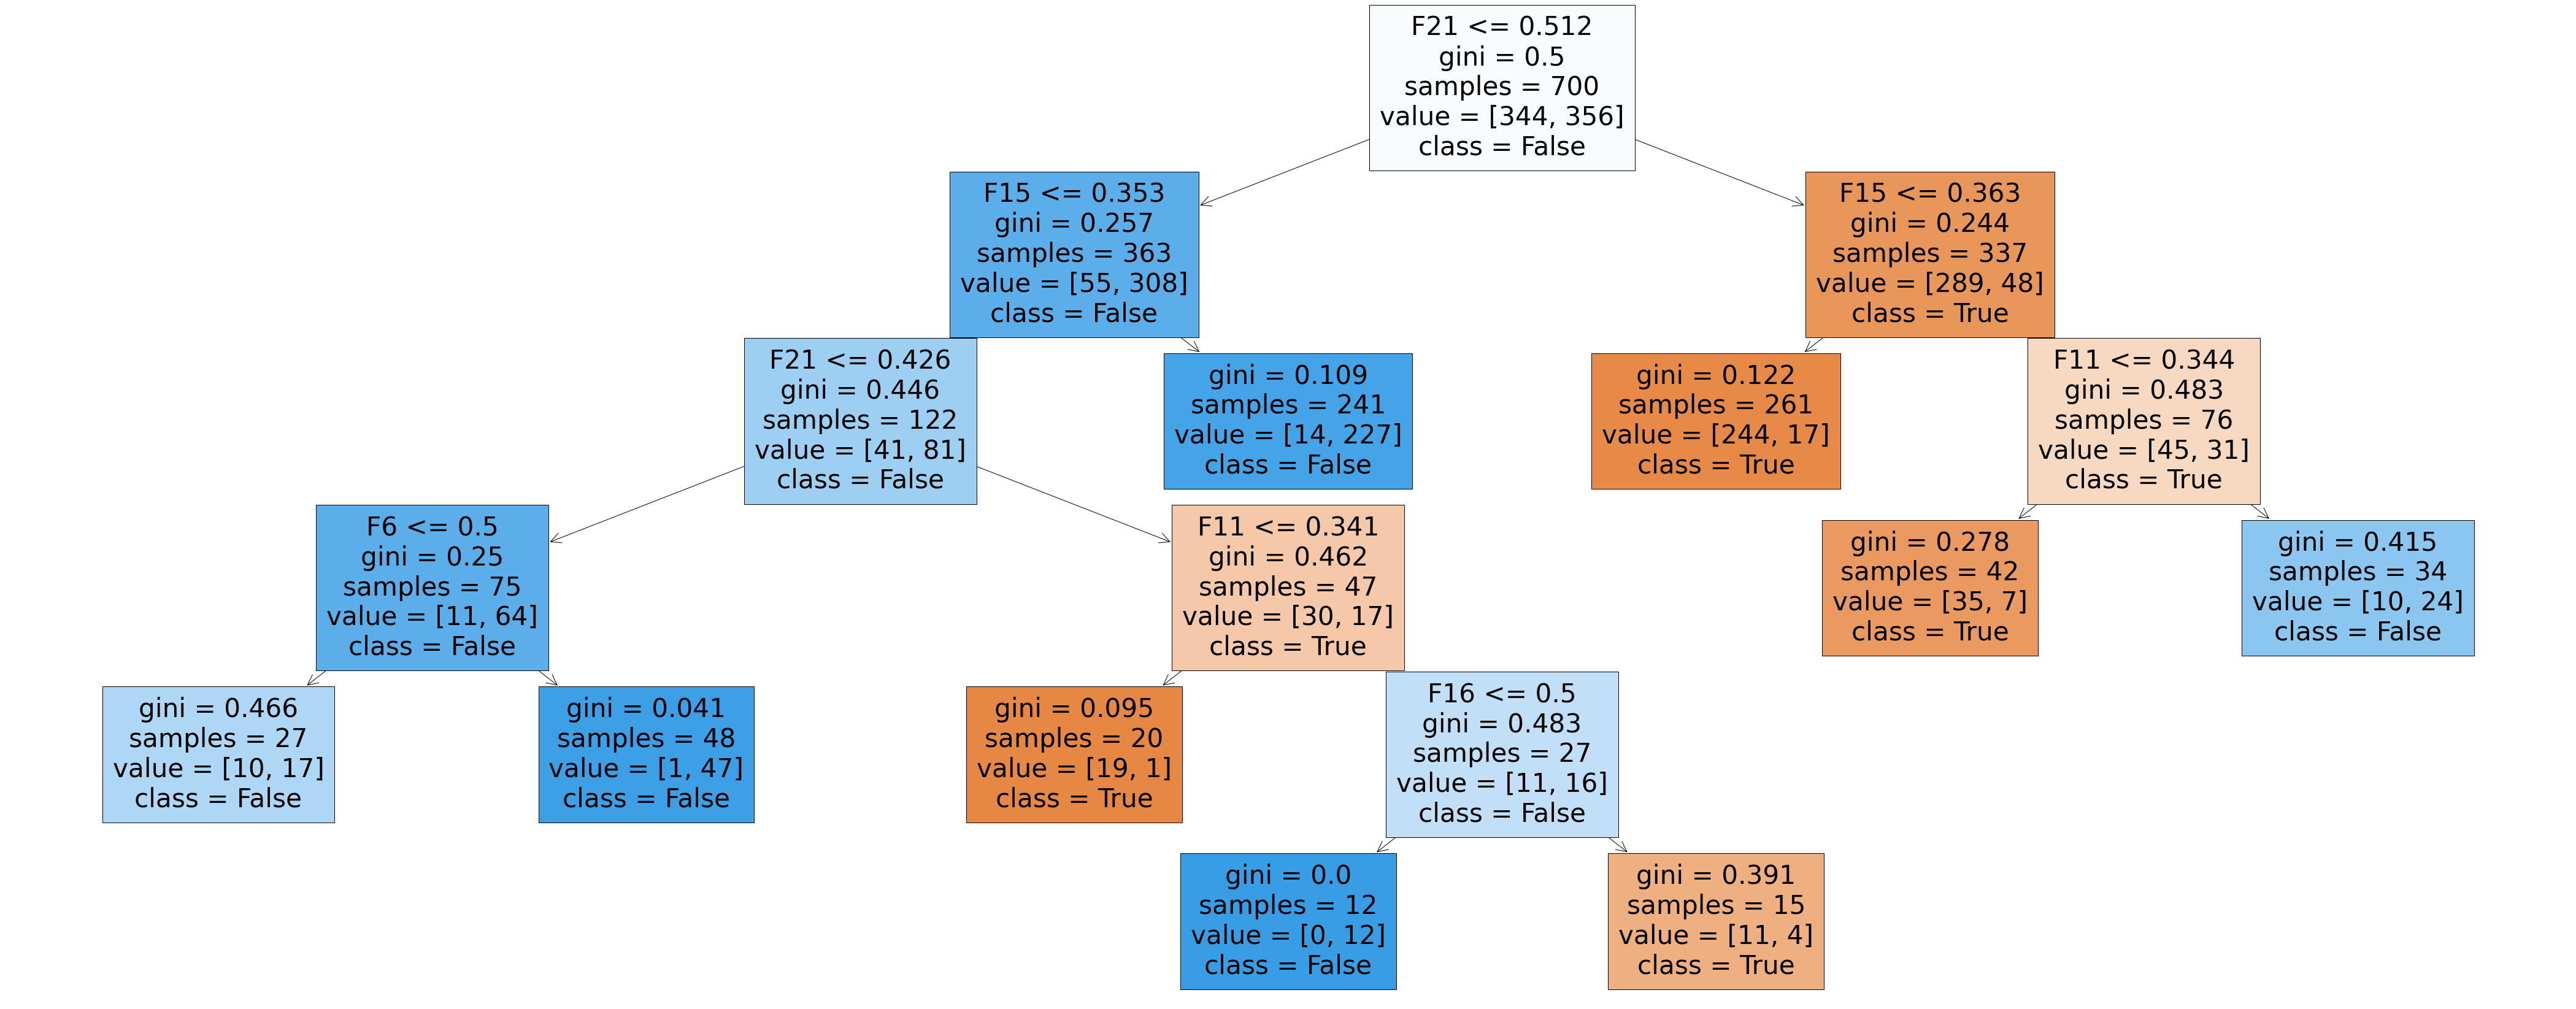

In [16]:
f_names = train.columns[:21]
label = ['True','False']
# Sets the figure size
fig = plt.figure(figsize=(75, 30))

# for displaying the decision tree model
pt = plot_tree(
    decision_tree,
    feature_names = f_names,
    class_names=label,
    max_depth=None,
    filled=True)

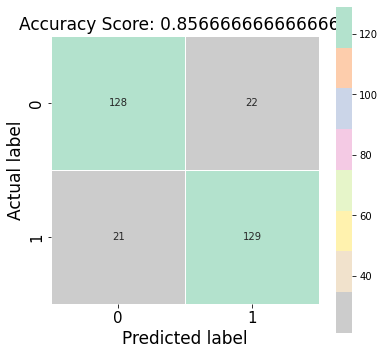

In [21]:
#Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
score =metrics.accuracy_score(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(matrix, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Pastel2_r');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [20]:
#Evaluating the model using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       150
         1.0       0.85      0.86      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



#### 2. Support Vector Machines

In [22]:
#Optimization of parameters
svc = SVC ()
#Using GridSearch for getting the best parameters
grid = GridSearchCV(
    svc,
    {'kernel' : ['linear','rbf'],
    'C' : [0.1,1,2,10]},
    cv = 5)
grid.fit(X_train, y_train)
# Stores the optimum model in svc
svc = grid.best_estimator_
# Displays the optimum model
svc.get_params()

{'C': 2,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [23]:
#Implementing SVC model
svc.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [24]:
#Predicting on the test set from the train-test split data
y_pred1 = svc.predict(X_test)

In [25]:
#Classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       150
         1.0       0.82      0.81      0.81       150

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [27]:
#Printing the mean accuracy on the test data and labels
print('Mean Accuracy on Train set :',svc.score(X_train, y_train))
print('Mean Accuracy on Test set :',svc.score(X_test, y_test))

Mean Accuracy on Train set : 0.8757142857142857
Mean Accuracy on Test set : 0.8133333333333334


#### 3.Logistic Regressor

In [28]:
#Optimization of parameters
lr = LogisticRegression()
param = [    
    {'penalty' : ['l2'],
    'C' : [0.01, 1.0, 0.1, 100, 10],
    'solver' : ['liblinear', 'newton-cg','lbfgs']
    }
]
#Using GridSearch for getting the best parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=lr, param_grid=param, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid.fit(X_train, y_train)
# Stores the optimum model in lr
lr = grid_result.best_estimator_
# Displays the optimum model
print(lr.get_params())

{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [29]:
#Implementing Logistic Regressor model
lr.fit(X_train,y_train)

LogisticRegression(C=10, solver='newton-cg')

In [30]:
y_pred2=lr.predict(X_test)

In [34]:
#Evaluating the model
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       150
         1.0       0.82      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



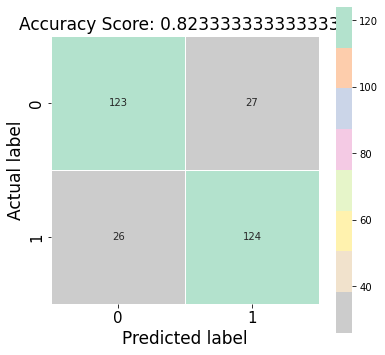

In [35]:
#Plotting confusion matrix
m = confusion_matrix(y_test, y_pred2)
score =metrics.accuracy_score(y_test, y_pred2)
plt.figure(figsize=(6,6))
sns.heatmap(m, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Pastel2_r');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

### Part B

In [ ]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
#For normalizing between 0-1
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)
#Imputing missing values
test_data = pd.DataFrame(imputer.fit_transform(test_data),columns = test_data.columns)
#All three models performed well. Decision Tree comparitively performed well.So prediction is done on that model
predicted = decision_tree.predict(test_data)
#Since the predicted model will be in 1 and 0 format, I am converting it into boolean
predicted =predicted>0 
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])